In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d jangedoo/utkface-new  # fatch the data

100% 330M/331M [00:11<00:00, 41.6MB/s]
100% 331M/331M [00:11<00:00, 31.1MB/s]


In [7]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [24]:
import os
import cv2
import matplotlib.pyplot as plt
import  seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet

In [9]:
folder_path = "/content/utkface_aligned_cropped/UTKFace"

In [10]:
# this will extract the age gender and image from folder
age = []
gender = []
image = []

for i in os.listdir(folder_path):

    age.append(int(i.split("_")[0]))

    gender.append(int(i.split("_")[1]))

    image.append(i)



In [11]:
print(len(age))
print(len(gender))
print(len(image))

23708
23708
23708


In [12]:
data = pd.DataFrame({'age':age,'gender':gender,'image':image}) # create data Frame

In [13]:
data.head()

,age,gender,image
0,40,1,40_1_1_20170110153441199.jpg.chip.jpg
1,53,0,53_0_0_20170120222602009.jpg.chip.jpg
2,25,0,25_0_3_20170119171150192.jpg.chip.jpg
3,37,1,37_1_0_20170117140111378.jpg.chip.jpg
4,31,1,31_1_3_20170104234902482.jpg.chip.jpg


In [14]:
data.tail()

,age,gender,image
23703,26,0,26_0_0_20170113210319560.jpg.chip.jpg
23704,22,1,22_1_3_20170104222220913.jpg.chip.jpg
23705,3,1,3_1_2_20161219212116151.jpg.chip.jpg
23706,35,0,35_0_4_20170117203249167.jpg.chip.jpg
23707,47,1,47_1_3_20170109142337247.jpg.chip.jpg


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23708 non-null  int64 
 1   gender  23708 non-null  int64 
 2   image   23708 non-null  object
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,23708.0,33.303484,19.886112,1.0,23.0,29.0,45.0,116.0
gender,23708.0,0.477349,0.499497,0.0,0.0,0.0,1.0,1.0


<ipython-input-17-79e5b578b98a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


<Axes: xlabel='age', ylabel='Density'>

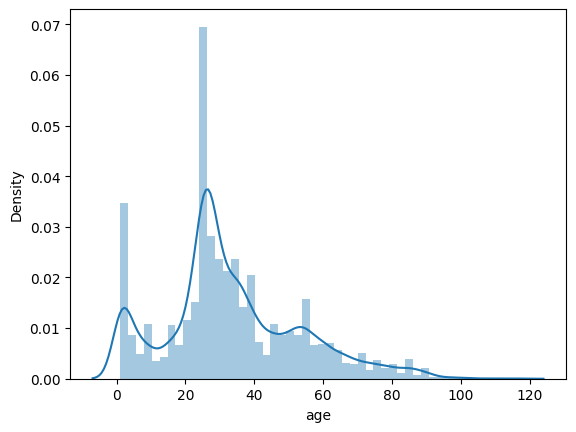

In [17]:
# check the distribution of age
sns.distplot(data["age"])

<Axes: ylabel='gender'>

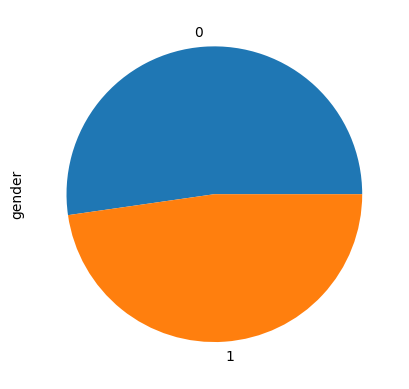

In [18]:
#plot pie diegram to check the value count of gendet
data["gender"].value_counts().plot.pie() #data is balance

In [19]:
# now split data in train and test
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2,random_state=42)

In [20]:
train.shape

(18966, 3)

In [21]:
test.shape

(4742, 3)

In [22]:
# apply image agumentation

train_gen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

In [23]:
train_data = train_gen.flow_from_dataframe(train,
                                           directory=folder_path,
                                           x_col="image",
                                           y_col=["age","gender"],
                                           target_size=(256, 256),
                                           class_mode = "multi_output")

test_data = test_gen.flow_from_dataframe(test,
                                           directory=folder_path,
                                           x_col="image",
                                           y_col=["age","gender"],
                                           target_size=(256, 256),
                                           class_mode = "multi_output")

Found 18966 validated image filenames.
Found 4742 validated image filenames.


In [33]:
# create model resnet50
mobile = MobileNet(
    include_top=False,
    weights='imagenet',
    input_shape=(256,256,3)
    )

In [34]:
for layer in mobile.layers:
  print(layer.name,layer.trainable)#get layers name

input_2 True
conv1 True
conv1_bn True
conv1_relu True
conv_dw_1 True
conv_dw_1_bn True
conv_dw_1_relu True
conv_pw_1 True
conv_pw_1_bn True
conv_pw_1_relu True
conv_pad_2 True
conv_dw_2 True
conv_dw_2_bn True
conv_dw_2_relu True
conv_pw_2 True
conv_pw_2_bn True
conv_pw_2_relu True
conv_dw_3 True
conv_dw_3_bn True
conv_dw_3_relu True
conv_pw_3 True
conv_pw_3_bn True
conv_pw_3_relu True
conv_pad_4 True
conv_dw_4 True
conv_dw_4_bn True
conv_dw_4_relu True
conv_pw_4 True
conv_pw_4_bn True
conv_pw_4_relu True
conv_dw_5 True
conv_dw_5_bn True
conv_dw_5_relu True
conv_pw_5 True
conv_pw_5_bn True
conv_pw_5_relu True
conv_pad_6 True
conv_dw_6 True
conv_dw_6_bn True
conv_dw_6_relu True
conv_pw_6 True
conv_pw_6_bn True
conv_pw_6_relu True
conv_dw_7 True
conv_dw_7_bn True
conv_dw_7_relu True
conv_pw_7 True
conv_pw_7_bn True
conv_pw_7_relu True
conv_dw_8 True
conv_dw_8_bn True
conv_dw_8_relu True
conv_pw_8 True
conv_pw_8_bn True
conv_pw_8_relu True
conv_dw_9 True
conv_dw_9_bn True
conv_dw_9_relu Tr

In [35]:
resnet.trainable = True

set_trainable = False

# this loop wil Activate Specific Layers to train
for layer in mobile.layers:
  if layer.name == "conv_pad_2":
    set_trainable = True

  if set_trainable:
    layer.trainable = True

  else:
    layer.trainable = False

for layer in mobile.layers:
  print(layer.name,layer.trainable)#get layers name

input_2 False
conv1 False
conv1_bn False
conv1_relu False
conv_dw_1 False
conv_dw_1_bn False
conv_dw_1_relu False
conv_pw_1 False
conv_pw_1_bn False
conv_pw_1_relu False
conv_pad_2 True
conv_dw_2 True
conv_dw_2_bn True
conv_dw_2_relu True
conv_pw_2 True
conv_pw_2_bn True
conv_pw_2_relu True
conv_dw_3 True
conv_dw_3_bn True
conv_dw_3_relu True
conv_pw_3 True
conv_pw_3_bn True
conv_pw_3_relu True
conv_pad_4 True
conv_dw_4 True
conv_dw_4_bn True
conv_dw_4_relu True
conv_pw_4 True
conv_pw_4_bn True
conv_pw_4_relu True
conv_dw_5 True
conv_dw_5_bn True
conv_dw_5_relu True
conv_pw_5 True
conv_pw_5_bn True
conv_pw_5_relu True
conv_pad_6 True
conv_dw_6 True
conv_dw_6_bn True
conv_dw_6_relu True
conv_pw_6 True
conv_pw_6_bn True
conv_pw_6_relu True
conv_dw_7 True
conv_dw_7_bn True
conv_dw_7_relu True
conv_pw_7 True
conv_pw_7_bn True
conv_pw_7_relu True
conv_dw_8 True
conv_dw_8_bn True
conv_dw_8_relu True
conv_pw_8 True
conv_pw_8_bn True
conv_pw_8_relu True
conv_dw_9 True
conv_dw_9_bn True
conv_dw

In [42]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 128, 128, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 128, 128, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 128, 128, 32

In [43]:
output = mobile.output
flatten = Flatten()(output)

# Age prediction branch with dropout
x_age = Dense(500, activation="elu", kernel_initializer='he_normal')(flatten)
x_age = BatchNormalization()(x_age)
x_age = Dropout(0.5)(x_age)  # Add dropout with a probability of 0.5

x_age = Dense(420, activation="elu", kernel_initializer='he_normal')(x_age)
x_age = BatchNormalization()(x_age)
x_age = Dropout(0.4)(x_age)  # Add dropout with a probability of 0.5

x_age = Dense(350, activation="elu", kernel_initializer='he_normal')(x_age)
x_age = BatchNormalization()(x_age)
x_age = Dropout(0.3)(x_age)  # Add dropout with a probability of 0.5

x_age = Dense(300, activation="elu", kernel_initializer='he_normal')(x_age)
x_age = BatchNormalization()(x_age)
x_age = Dropout(0.3)(x_age)  # Add dropout with a probability of 0.5

x_age = Dense(150, activation="elu", kernel_initializer='he_normal')(x_age)
x_age = BatchNormalization()(x_age)
x_age = Dropout(0.1)(x_age)  # Add dropout with a probability of 0.5

output1 = Dense(1, activation="linear", name="age")(x_age)

# Gender prediction branch with dropout
x_gender = Dense(500, activation="elu", kernel_initializer='he_normal')(flatten)
x_gender = BatchNormalization()(x_gender)
x_gender = Dropout(0.5)(x_gender)  # Add dropout with a probability of 0.5

x_gender = Dense(420, activation="elu", kernel_initializer='he_normal')(x_gender)
x_gender = BatchNormalization()(x_gender)
x_gender = Dropout(0.4)(x_gender)  # Add dropout with a probability of 0.5

x_gender = Dense(350, activation="elu", kernel_initializer='he_normal')(x_gender)
x_gender = BatchNormalization()(x_gender)
x_gender = Dropout(0.3)(x_gender)  # Add dropout with a probability of 0.5

x_gender = Dense(300, activation="elu", kernel_initializer='he_normal')(x_gender)
x_gender = BatchNormalization()(x_gender)
x_gender = Dropout(0.3)(x_gender)  # Add dropout with a probability of 0.5

x_gender = Dense(150, activation="elu", kernel_initializer='he_normal')(x_gender)
x_gender = BatchNormalization()(x_gender)
x_gender = Dropout(0.1)(x_gender)  # Add dropout with a probability of 0.5

output2 = Dense(1, activation="sigmoid", name="gender")(x_gender)


In [44]:
# create model
model = Model(inputs=mobile.input,outputs=[output1,output2])

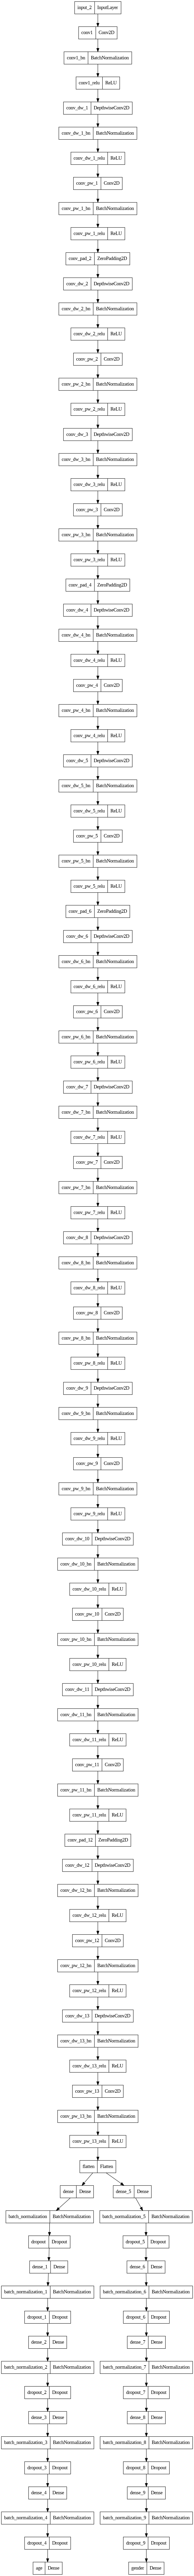

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [46]:
import tensorflow as tf
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = {"age":"mse","gender":"binary_crossentropy"},
    metrics={"age":"mae","gender":"accuracy"}
)

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_2[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 32)         128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['conv1_bn[0][0]']        

In [48]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

In [49]:
model.fit(
    train_data,
    batch_size=32,
    epochs=10,
    validation_data=test_data,
    callbacks=[early_stopping]
)

Epoch 1/10
593/593 [==============================] - 368s 568ms/step - loss: 565.2419 - age_loss: 564.5852 - gender_loss: 0.6564 - age_mae: 18.9035 - gender_accuracy: 0.6460 - val_loss: 102.4939 - val_age_loss: 101.9033 - val_gender_loss: 0.5906 - val_age_mae: 7.3522 - val_gender_accuracy: 0.6940
Epoch 2/10
593/593 [==============================] - 376s 635ms/step - loss: 117.5449 - age_loss: 116.9577 - gender_loss: 0.5873 - age_mae: 7.9991 - gender_accuracy: 0.6893 - val_loss: 89.8504 - val_age_loss: 89.3186 - val_gender_loss: 0.5319 - val_age_mae: 6.7610 - val_gender_accuracy: 0.7320
Epoch 3/10
593/593 [==============================] - 336s 567ms/step - loss: 105.6690 - age_loss: 105.1157 - gender_loss: 0.5532 - age_mae: 7.5839 - gender_accuracy: 0.7134 - val_loss: 104.6346 - val_age_loss: 104.0885 - val_gender_loss: 0.5461 - val_age_mae: 7.5480 - val_gender_accuracy: 0.7379
Epoch 4/10
593/593 [==============================] - 333s 561ms/step - loss: 102.7004 - age_loss: 102.1540

In [74]:
img = cv2.imread("/content/685839-virat-kohli-reuters.jpg")

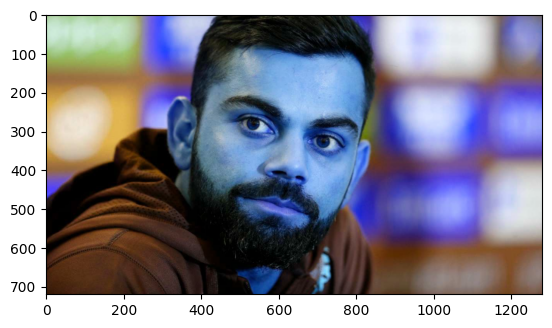

In [75]:
plt.imshow(img)

In [76]:
reshape_image = cv2.resize(img,(256,256))

In [77]:
test_input = reshape_image.reshape((1,256,256,3))

In [78]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


[array([[38.467297]], dtype=float32), array([[0.23592243]], dtype=float32)]